In [184]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [264]:
#Read in the csv file and convert to a Pandas dataframe
houses_train = pd.read_csv("data/train.csv")
#houses_test = pd.read_csv("data/test.csv")
#sale_price = pd.read_csv("data/sample_submission.csv")

In [186]:
# Merge the test dataset with the target 
#houses_test = houses_test.merge(sale_price,on='Id')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [187]:
houses_train.shape

(1460, 81)

In [188]:
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [189]:
houses_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [190]:
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [191]:
houses_train.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [192]:
houses_train.isnull().sum().sort_values(ascending=False).head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

In [193]:
houses_train["LotFrontage"].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [194]:
houses_train.shape

(1460, 81)

#### 7. Check Accuracy:


## 2. Data Cleaning: 



### Handling missing values:

In [265]:
columns_to_drop = ["MiscFeature", "Alley", "Fence"]
houses_train.drop(columns=columns_to_drop, inplace=True)

In [196]:
houses_train['PoolQC'].isnull().sum()

1453

In [266]:
houses_train.drop('PoolQC',axis=1,inplace=True)

In [267]:
houses_train["MasVnrType"].fillna("NA",inplace=True)
houses_train["BsmtExposure"].fillna("NA",inplace=True)
houses_train["FireplaceQu"].fillna("NA",inplace=True)
houses_train["BsmtFinType2"].fillna("NA",inplace=True)
houses_train.fillna(0,inplace=True)
       

C:\Users\user\AppData\Local\Temp\ipykernel_24460\3840104012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  houses_train["MasVnrType"].fillna("NA",inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_24460\3840104012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [199]:
houses_train.isnull().sum().sort_values(ascending=False).head(30)

Id               0
HalfBath         0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
HeatingQC        0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
dtype: int64

### Outliers

-------------------

In [200]:
# Compute Z-scores for the "SalePrice" column
houses_train["p_z_score"] = zscore(houses_train["SalePrice"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs = houses_train[houses_train["p_z_score"].abs() > 3].sort_values('SalePrice').index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]


In [201]:
# Compute Z-scores for the "GrLivArea" column
houses_train["p_z_score"] = zscore(houses_train["GrLivArea"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs = houses_train[houses_train["p_z_score"].abs() > 3].sort_values('GrLivArea').index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]


In [202]:
# Compute Z-scores for the "TotRmsAbvGrd" column
houses_train["p_z_score"] = zscore(houses_train["TotRmsAbvGrd"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs = houses_train[houses_train["p_z_score"].abs() > 3].sort_values('TotRmsAbvGrd').index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]


In [203]:
# Compute Z-scores for the "TotRmsAbvGrd" column
houses_train["p_z_score"] = zscore(houses_train["WoodDeckSF"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs =houses_train[houses_train["p_z_score"].abs() > 4]['WoodDeckSF'].sort_values().index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]


In [204]:
# Compute Z-scores for the "TotRmsAbvGrd" column
houses_train["p_z_score"] = zscore(houses_train["2ndFlrSF"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset


indexs =houses_train[houses_train["p_z_score"].abs() > 3]['2ndFlrSF'].sort_values().index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]



In [205]:
# Compute Z-scores for the "YearRemodAdd" column
houses_train["p_z_score"] = zscore(houses_train["YearRemodAdd"])



# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

indexs = houses_train[houses_train["p_z_score"].abs() > 3].sort_values('YearRemodAdd').index

houses_train.drop(indexs,inplace=True)
del houses_train["p_z_score"]

In [206]:
houses_train.shape

(1405, 77)

In [207]:
# Identify numerical columns
numerical_features = houses_train.select_dtypes(include=['number']).columns.tolist()

# Display the numerical columns
#numerical_features

## 3. Univariate Analysis: 



#### II. Numerical Variables:


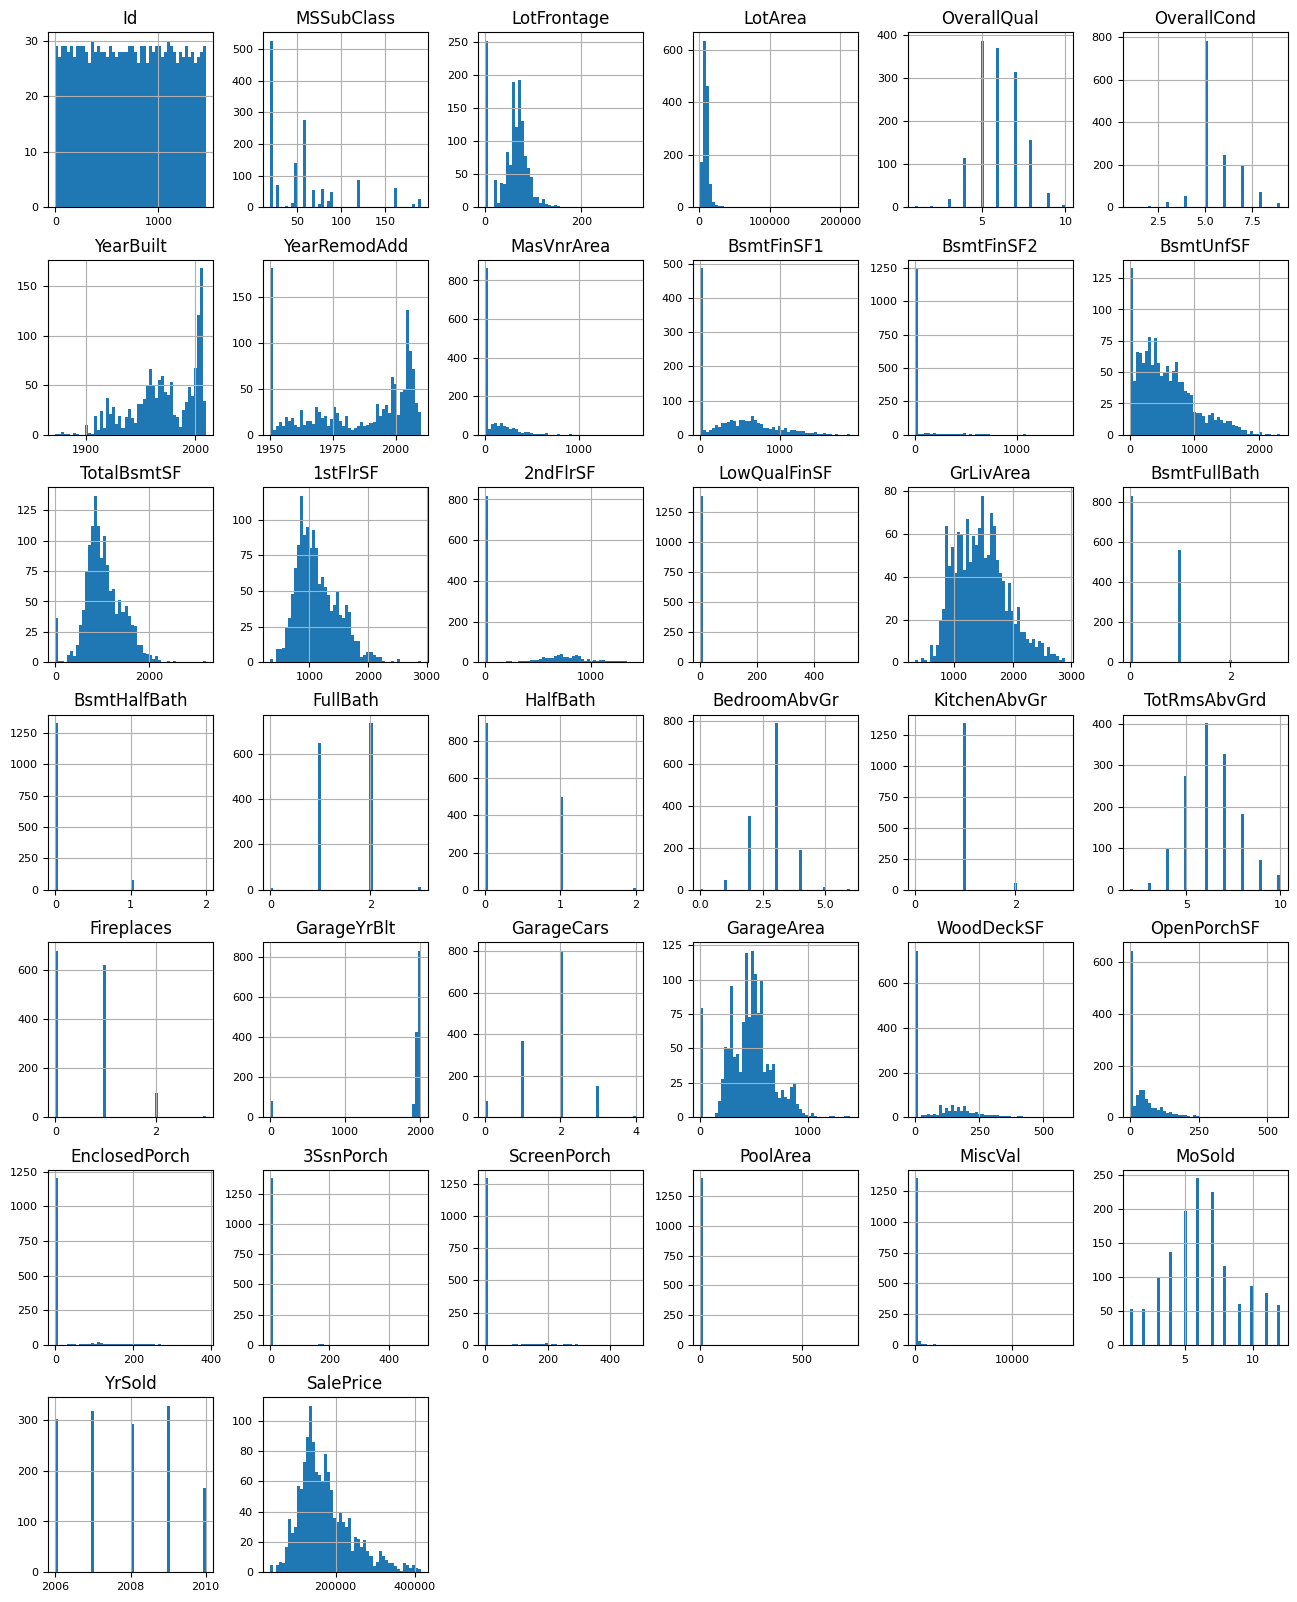

In [208]:
df_num = houses_train.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

## Feature engineering: 

- Feature scaling
- Aggregation
- One hot coding

-------------------

In [268]:
categorical_features = houses_train.select_dtypes(include=object).columns
numeric_features = houses_train.select_dtypes(include=np.number).columns
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [210]:
numeric_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [211]:
for i in categorical_features:
    print(houses_train[i].value_counts().sort_values())

MSZoning
C (all)      10
RH           15
FV           64
RM          212
RL         1104
Name: count, dtype: int64
Street
Grvl       5
Pave    1400
Name: count, dtype: int64
LotShape
IR3      9
IR2     36
IR1    460
Reg    900
Name: count, dtype: int64
LandContour
Low      35
HLS      46
Bnk      58
Lvl    1266
Name: count, dtype: int64
Utilities
NoSeWa       1
AllPub    1404
Name: count, dtype: int64
LotConfig
FR3           4
FR2          47
CulDSac      88
Corner      249
Inside     1017
Name: count, dtype: int64
LandSlope
Sev      12
Mod      61
Gtl    1332
Name: count, dtype: int64
Neighborhood
Blueste      2
NPkVill      9
Veenker     10
BrDale      16
MeadowV     16
Blmngtn     17
StoneBr     20
SWISU       22
ClearCr     27
NoRidge     34
Timber      37
IDOTRR      37
Crawfor     48
Mitchel     49
SawyerW     56
BrkSide     58
NridgHt     66
NWAmes      70
Sawyer      73
Gilbert     79
Somerst     84
Edwards     97
OldTown    108
CollgCr    149
NAmes      221
Name: count, dtype:

In [269]:
counts = houses_train['SaleType'].value_counts()


houses_train = houses_train[houses_train['SaleType'].isin(counts[counts >3].index)]

In [270]:
houses_train.shape

(1455, 77)

In [271]:
counts = houses_train['GarageCond'].value_counts()


houses_train = houses_train[houses_train['GarageCond'].isin(counts[counts >3].index)]

In [272]:
counts = houses_train['Functional'].value_counts()


houses_train = houses_train[houses_train['Functional'].isin(counts[counts >3].index)]

In [273]:
counts = houses_train['Electrical'].value_counts()


houses_train = houses_train[houses_train['Electrical'].isin(counts[counts >3].index)]

In [274]:
counts = houses_train['HeatingQC'].value_counts()


houses_train = houses_train[houses_train['HeatingQC'].isin(counts[counts >3].index)]

In [275]:
counts = houses_train['Heating'].value_counts()


houses_train = houses_train[houses_train['Heating'].isin(counts[counts >3].index)]

In [276]:
counts = houses_train['BsmtCond'].value_counts()


houses_train = houses_train[houses_train['BsmtCond'].isin(counts[counts >3].index)]

In [277]:
counts = houses_train['Foundation'].value_counts()


houses_train = houses_train[houses_train['Foundation'].isin(counts[counts >3].index)]

In [278]:
counts = houses_train['ExterCond'].value_counts()


houses_train = houses_train[houses_train['ExterCond'].isin(counts[counts >3].index)]

In [279]:
counts = houses_train['Exterior2nd'].value_counts()


houses_train = houses_train[houses_train['Exterior2nd'].isin(counts[counts >3].index)]

In [280]:
counts = houses_train['Exterior1st'].value_counts()


houses_train = houses_train[houses_train['Exterior1st'].isin(counts[counts >3].index)]

In [281]:
counts = houses_train['RoofMatl'].value_counts()


houses_train = houses_train[houses_train['RoofMatl'].isin(counts[counts >3].index)]

In [282]:
counts = houses_train['RoofStyle'].value_counts()


houses_train = houses_train[houses_train['RoofStyle'].isin(counts[counts >3].index)]

In [283]:
counts = houses_train['HouseStyle'].value_counts()


houses_train = houses_train[houses_train['HouseStyle'].isin(counts[counts >3].index)]

In [284]:
counts = houses_train['Condition2'].value_counts()


houses_train = houses_train[houses_train['Condition2'].isin(counts[counts >3].index)]

In [285]:
counts = houses_train['Condition1'].value_counts()


houses_train = houses_train[houses_train['Condition1'].isin(counts[counts >3].index)]

In [286]:
counts = houses_train['Neighborhood'].value_counts()


houses_train = houses_train[houses_train['Neighborhood'].isin(counts[counts >3].index)]

In [287]:
counts = houses_train['Utilities'].value_counts()


houses_train = houses_train[houses_train['Utilities'].isin(counts[counts >3].index)]

In [288]:
counts = houses_train['GarageCond'].value_counts()


houses_train = houses_train[houses_train['GarageCond'].isin(counts[counts >3].index)]

In [289]:
houses_train.shape

(1407, 77)

In [290]:
# one hot coding for categorical_features
houses_train = pd.get_dummies(houses_train,columns=categorical_features)

#### 3. Feature selection


In [291]:
correlation = houses_train.corr()
correlation['SalePrice'].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.795192
GrLivArea           0.740853
TotalBsmtSF         0.648242
GarageCars          0.640914
                      ...   
BsmtQual_TA        -0.462358
FireplaceQu_NA     -0.467021
KitchenQual_TA     -0.521830
ExterQual_TA       -0.588770
Utilities_AllPub         NaN
Name: SalePrice, Length: 252, dtype: float64

In [319]:
correlation = houses_train.corr()
correlation[abs(correlation['SalePrice']) > 0.2]['SalePrice'].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.795192
GrLivArea           0.740853
TotalBsmtSF         0.648242
GarageCars          0.640914
                      ...   
GarageFinish_Unf   -0.416146
BsmtQual_TA        -0.462358
FireplaceQu_NA     -0.467021
KitchenQual_TA     -0.521830
ExterQual_TA       -0.588770
Name: SalePrice, Length: 76, dtype: float64

In [320]:
# Set the correlation threshold
threshold = 0.3  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['SalePrice']) > threshold]['SalePrice'].index
selected_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_NA', 'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'HeatingQC_TA', 'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA',
       'FireplaceQu_Gd', 'FireplaceQu_NA', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_Unf',
       'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

In [321]:
df_houses_train = houses_train[selected_features]
df_houses_train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_NA,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,SaleType_New,SaleCondition_Partial
0,7,2003,2003,196.0,706,856,856,854,1710,2,...,True,False,False,True,True,False,False,False,False,False
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,...,False,True,False,False,True,False,False,False,False,False
2,7,2001,2002,162.0,486,920,920,866,1786,2,...,True,False,False,False,True,False,False,False,False,False
3,7,1915,1970,0.0,216,756,961,756,1717,1,...,True,False,True,False,False,True,False,True,False,False
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,...,True,False,False,False,True,False,False,False,False,False


In [322]:
df_houses_train.shape

(1407, 45)

## Prepare train and test data


In [323]:
# Prepare data
X = df_houses_train.drop(["SalePrice"], axis=1)
y = df_houses_train["SalePrice"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=99)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [324]:
X.shape

(1407, 44)

In [325]:
y.shape

(1407,)

## Model LR




### Build the model

In [326]:
# build the model
model = LinearRegression()


In [327]:
# Train the Model
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [328]:
# Test the Model
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)      # Linear regression model
y_pred

array([284754.97444174, 183946.39842086, 177668.87739681, 131874.88207297,
       139997.51738714, 155867.46330834, 240748.5678354 , 116623.11280781,
       121795.68911019, 168622.87355753, 190176.85071929, 201010.64946642,
       171312.17682621, 208569.02251973, 286568.79281595, 174724.46379931,
       125624.92398164, 173735.40417731, 200394.6487661 , 166507.37474341,
       152397.52442755, 170867.64197954, 154183.39518472, 112223.23578907,
       344317.69742321, 217539.26532992, 189583.90765406, 178124.60755233,
       187324.65027935, 182413.67044514, 201314.85441858, 164718.28650425,
        64801.85341751, 241861.14501298, 161796.00608489, 151151.93990071,
       152166.04525464, 153658.33103969, 122559.68829931, 129471.38209073,
       251903.72277652, 263498.41367069, 151264.71473893, 257770.51781989,
       146383.13022107, 149384.31813008, 366596.95982844, 252585.67772722,
       197754.30323827,  95350.51165087, 224556.25386689, 119115.95702291,
       284537.73097005, 1

In [329]:
# Interpretation of the Model
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients


In [330]:
coeff_df

,Coefficient
OverallQual,13777.082309
YearBuilt,5509.641758
YearRemodAdd,1807.285527
MasVnrArea,6253.544675
BsmtFinSF1,8172.207414
TotalBsmtSF,5826.586410
1stFlrSF,12493.100060
2ndFlrSF,13440.706280
GrLivArea,14111.511935
FullBath,-1608.464749


In [331]:
print(f" Linear regression intercept: {model.intercept_}") 


 Linear regression intercept: 182994.737804878


### Evaluating the Model


##### Mean Square Error

In [332]:
# Mean Square Error
y_base = [y_train.mean()] * len(y_test)
y_base


[182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780487804,
 182994.73780

In [333]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 5.740431e+09


In [334]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 6.719323e+08
Mean Squared Error for testing: 7.395158e+08



##### Mean Absolute Error


In [335]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 5.626187e+04


In [336]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 1.796823e+04
Mean Absolute Error for testing: 1.828659e+04


##### Root Mean Squared Error


In [337]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 7.576563e+04


In [338]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 2.592166e+04
Root Mean Squared Error for testing: 2.719404e+04


##### R Square


In [339]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.8974866246909983
R Square for testing: 0.8708212857960472


#### Predictions vs. Real Values


In [313]:
predictions = model.predict(X_test_scaled)
predictions

array([284754.97444174, 183946.39842086, 177668.87739681, 131874.88207297,
       139997.51738714, 155867.46330834, 240748.5678354 , 116623.11280781,
       121795.68911019, 168622.87355753, 190176.85071929, 201010.64946642,
       171312.17682621, 208569.02251973, 286568.79281595, 174724.46379931,
       125624.92398164, 173735.40417731, 200394.6487661 , 166507.37474341,
       152397.52442755, 170867.64197954, 154183.39518472, 112223.23578907,
       344317.69742321, 217539.26532992, 189583.90765406, 178124.60755233,
       187324.65027935, 182413.67044514, 201314.85441858, 164718.28650425,
        64801.85341751, 241861.14501298, 161796.00608489, 151151.93990071,
       152166.04525464, 153658.33103969, 122559.68829931, 129471.38209073,
       251903.72277652, 263498.41367069, 151264.71473893, 257770.51781989,
       146383.13022107, 149384.31813008, 366596.95982844, 252585.67772722,
       197754.30323827,  95350.51165087, 224556.25386689, 119115.95702291,
       284537.73097005, 1

In [100]:
Real_Values = np.array(y_test)
Real_Values

array([192000, 125000, 128000, 141000, 224000,  84500, 119000, 128000,
       181000, 117000,  79500, 127500, 142125, 195400, 143250, 122500,
       230000, 180000, 108000, 145000, 137500, 159434, 301000, 325000,
       150750, 145000, 412500, 130000, 200000, 250000, 286000, 264132,
       171900, 215000, 394617, 134450, 129000, 192000, 197900, 235000,
       120000, 155000, 117000, 220000, 341000, 137500, 120000, 234000,
       142500, 113000, 302000, 219500, 258000, 125000, 119000, 112500,
       135000, 148000, 254000, 152000, 229456, 135000, 188000, 240000,
       190000, 402861,  79000, 133900, 415298, 130000, 268000, 145000,
       167000, 118500, 171000, 137500, 182900, 107900, 223500, 151000,
       135000, 179000, 176000, 266500, 139000, 160000, 213490, 318000,
       116000, 175000, 159000, 230000, 194500, 137450, 209500, 141000,
       124000, 249700, 275000, 138500, 146000, 235000, 244000, 124500,
       127000, 392500, 214000,  91000, 128500, 125000,  66500, 111000,
      

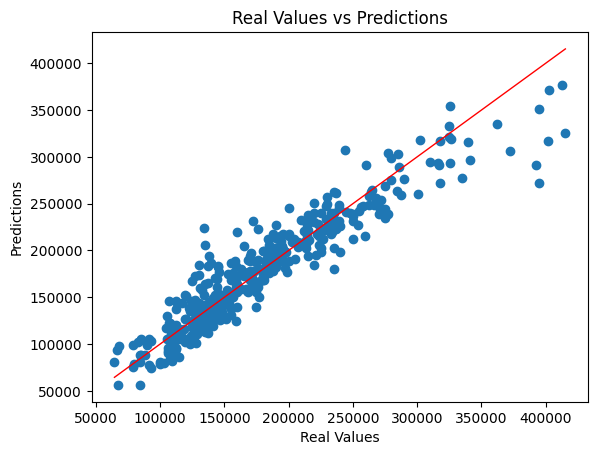

In [101]:
plt.scatter(Real_Values, predictions)
plt.plot([Real_Values.min(), Real_Values.max()], [Real_Values.min(), Real_Values.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24460\2651291080.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution


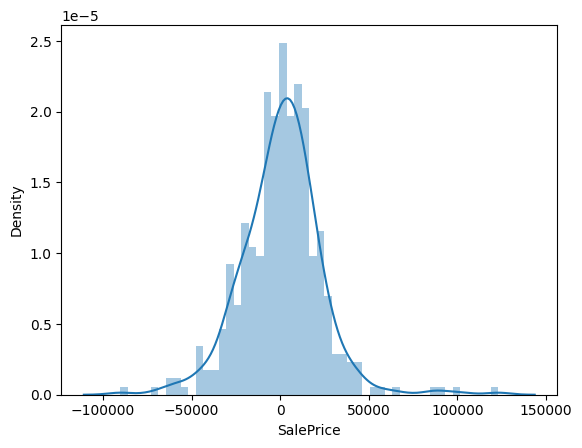

In [102]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution


### Ridge & Lasso Regression

In [340]:
from sklearn.linear_model import Ridge, Lasso



ridge_model = Ridge(alpha=100)  # Adjust alpha for stronger/weaker regularization
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Lasso Regression
lasso_model = Lasso(alpha=100)  # Adjust alpha; too high might remove all features
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate R² Scores
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Ridge Regression R² Score: {r2_ridge:.4f}")
print(f"Lasso Regression R² Score: {r2_lasso:.4f}")

Ridge Regression R² Score: 0.8667
Lasso Regression R² Score: 0.8697


In [315]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Tune Ridge
ridge_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_search.fit(X_train_scaled, y_train)
print("Best Ridge Alpha:", ridge_search.best_params_)

# Tune Lasso
lasso_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
lasso_search.fit(X_train_scaled, y_train)
print("Best Lasso Alpha:", lasso_search.best_params_)

Best Ridge Alpha: {'alpha': 100}


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.352e+11, tolerance: 5.445e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.779e+09, tolerance: 5.207e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

Best Lasso Alpha: {'alpha': 100}


## XGBRegressor

In [346]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
}
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s
[CV] END .learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.4s
[CV] END .learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.4s
[CV] END .learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.5s
[CV] END .learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.6s
[CV] END .learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.6s
[CV] END .learning_rate=0.01, max_depth=6, n_est

##### R Square


In [347]:

from sklearn.model_selection import cross_val_score

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = best_model.score(X_test, y_test)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R²: {cv_scores.mean():.4f}")

RMSE: 26166.886884023617
R² Score: 0.8803954810083464
Cross-Validation R²: 0.9001


## Polynomial Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Adjust max_depth as needed

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predict on training & test sets
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)



Decision Tree R² Score (Train): 0.8662
Decision Tree R² Score (Test): 0.7630


In [247]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [249]:
# Calculate R² Score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2 = best_model.score(X_test, y_test)


print(f"Decision Tree R² Score (Train): {r2_train:.4f}")
print(f"Decision Tree R² Score (Test): {r2_test:.4f}")
r2

Decision Tree R² Score (Train): 0.8662
Decision Tree R² Score (Test): 0.7630


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


-7.108937211255489

## KernelRidge

In [251]:
from sklearn.kernel_ridge import KernelRidge



krr_model = KernelRidge(alpha=1.0, kernel='rbf')  # RBF kernel for nonlinearity

# Train the model
krr_model.fit(X_train_scaled, y_train)

# Predict on training & test sets
y_train_pred = krr_model.predict(X_train_scaled)
y_test_pred = krr_model.predict(X_test_scaled)


param_grid = {
    "alpha": [0.1, 0.5, 0.6, 1, 5, 10],
    "kernel": ["polynomial", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "coef0": [0, 1, 2.5, 5]
}


grid_search = GridSearchCV(krr_model, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

KRR = grid_search.best_estimator_

# Calculate R² Score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f"Kernel Ridge Regression R² Score (Train): {r2_train:.4f}")
print(f"Kernel Ridge Regression R² Score (Test): {r2_test:.4f}")

Kernel Ridge Regression R² Score (Train): 0.8862
Kernel Ridge Regression R² Score (Test): 0.7210
